In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()   

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
print("category in 'gender' varible:   ",end=" ")
print(df['gender'].unique())

print("category in 'race' variable:  ",end=" ")
print(df['race_ethnicity'].unique())
print("category in 'parental level of education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())
print("category in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())
print("category in 'test preparation course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

category in 'gender' varible:    ['female' 'male']
category in 'race' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
category in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
category in 'lunch' variable:   ['standard' 'free/reduced']
category in 'test preparation course' variable:   ['none' 'completed']


In [17]:
numeric_feature=[feature for feature in df.columns if df[feature].dtype in ['int64','float64']]
categorical_feature=[feature for feature in df.columns if df[feature].dtype in ['object']]
print("numeric features: ",numeric_feature)
print("categorical features: ",categorical_feature)

numeric features:  ['math_score', 'reading_score', 'writing_score']
categorical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
df['total_score'] = df[numeric_feature].sum(axis=1)
df['average_score'] = df[numeric_feature].mean(axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


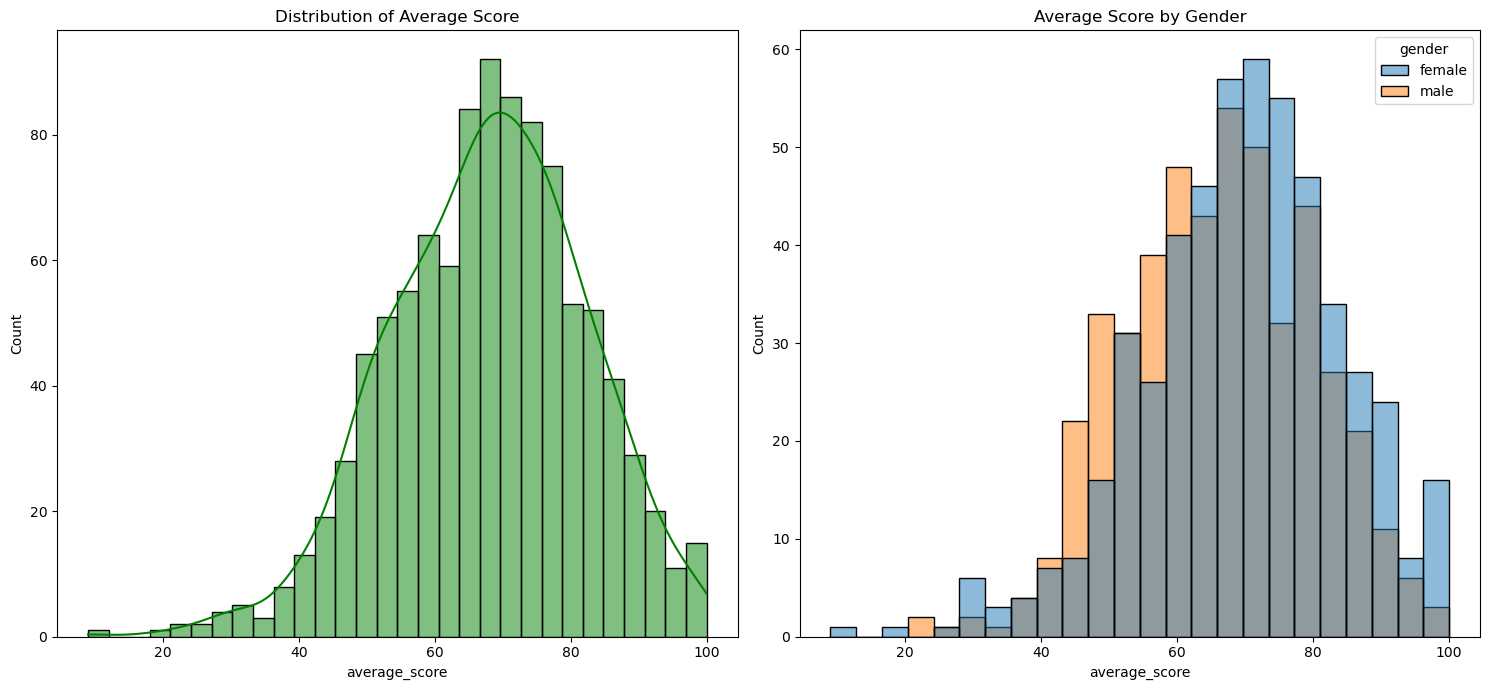

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot on the left
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Score')

# Second plot on the right
sns.histplot(data=df, x='average_score', hue='gender', ax=axs[1])
axs[1].set_title('Average Score by Gender')

plt.tight_layout()
plt.show()


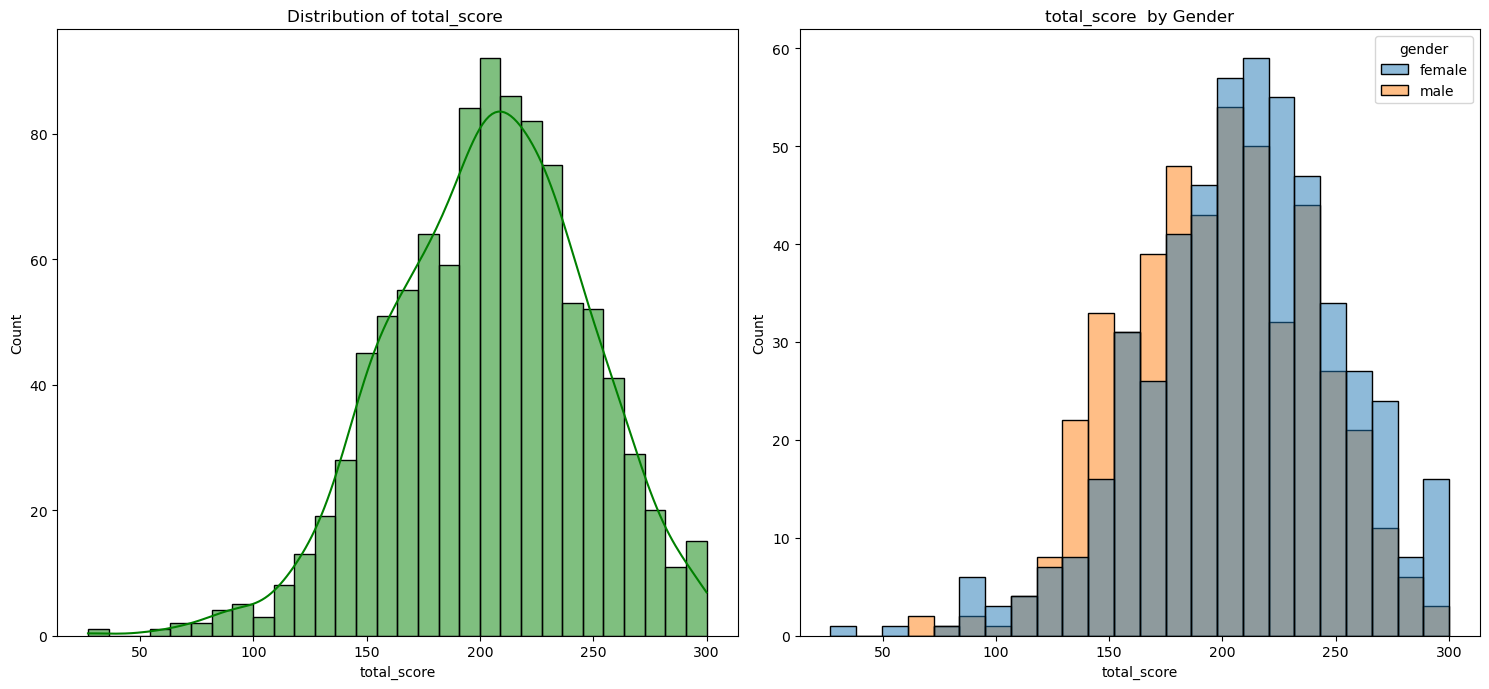

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot on the left
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of total_score ')

# Second plot on the right
sns.histplot(data=df, x='total_score', hue='gender', ax=axs[1])
axs[1].set_title('total_score  by Gender')

plt.tight_layout()
plt.show()
